# Using the Quantum Key Distribution Circuit Generator

In [27]:
%run QKD.ipynb

In order to generate a circuit instance of the Quantum Key Distribution protocol, one must first create a *QKD* class instance. This class takes in 5 parameters:

1. **eave** - A boolean deciding the inclusion or exclusion of an eavesdropper (default is *False*)
2. **init_length** - An integer setting the length of the initial message established by Alice (default is *100*)
3. **sample_size** - An integer setting the length of the message for Alice and Bob to sample in verifying their keys (default is *15*)
4. **seed** - An integer setting the seed of the random integer generator (default is *0*)
5. **barriers** - A boolean deciding if barriers should be included (default is *True*, and unless there is a specific reason to exclude, it is highly recommended that they remain)

Once the class has been created, it holds plenty of information about the protocol. Here are all of the attributes one could access:

- **alice_bits** - array of the qubits that Alice originally randomly generated, all in one of the two product states, 1 or 0.
- **alice_bases** - array of all the bases Alice will measure her qubits in. A *0* corresponds to the **Z** basis and a *1* corresponds to the **X** basis.
- **bob_bases** - array of all the bases Bob will measure his qubits in. Again, a *0* corresponds to the **Z** basis and a *1* corresponds to the **X** basis.
- **bob_results** - array holding the outcome of Bob measuring the message he received from Alice in his bases.
- **alice_key** - list of Alice's key after garbage is removed and the sample is removed. If there is no eavesdropper, this should be the same as Bob's key.
- **bob_key** - list of Bob's key after garbage is removed and the sample is removed. If there is no eavesdropper, this should be the same as Alice's key.
- **alice_sample** - array of Alice's sample selection of her key after removing garbage. If there is no eavesdropper, this should be the same as Bob's sample.
- **bob_sample** - array of Bob's sample selection of his key after removing garbage. If there is no eavesdropper, this should be the same as Alice's sample.

There are also two functions to keep in mind when using this class:

1. **circuits()** - This function will return a list of circuits. Each of the circuits describes a single qubit throughout the protocol.
2. **prob_eave_win()** - This function will return a decimal representing the probabiity that an eavesdropper could theoretically get away with their mischief (where the returned number is less than 1).

## Example without an Eavesdropper

For this first short tutorial, we will explore the situation of the protocol in which there is not an eavesdropper.

In [28]:
# "ne" stands for "No eavesdropper"
ne = QKD(False, 30, 5)

Now that the class has been created, we can create a list of the circuits so that we can better take a look at how each of the steps of the protocol occur.

In [29]:
ne_circuits = ne.circuits()

The first part of the protocol is for Alice to randomly generate her bits and her bases.

In [30]:
print("Alice bits:  ", ne.alice_bits)
print("Alice bases: ", ne.alice_bases)

Alice bits:   [0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0]
Alice bases:  [1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1]


Remember, in the case of the bases, a *0* correponds to a measurement in the **Z** basis, and a *1* corresponds to a measurement in the **X** basis. To see this, take a look at the first element of each of the arrays. This says that Alice starts with a qubit in the 0 state and prepares for it to be measured in the **X** basis. Let's see the circuit for this qubit:

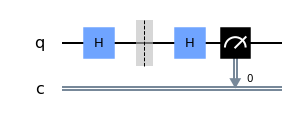

In [31]:
ne_circuits[0].draw('mpl')

The barriers of all these circuits will represent the switch between a person. For example, because there are no eavesdroppers in this version of the protocol, the two separated sections of this circuit represent Alice and Bob. So, to look at how Alice encodes this qubit, we need to examine before the first barrier. When we do this, we see that we retrieve exactly what we expect. Alice wanted to prep a *0* state qubit in the **X** basis, which is done by using a hadamard gate here. You could examine all of this other pairs and find that they all behave as expected as well.

The next step of the protocol is for Bob to establish his bases, measure according to those bases, and then retrieve his results.

In [32]:
print("Bob bases:   ", ne.bob_bases)
print("Bob results: ", ne.bob_results)

Bob bases:    [1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0]
Bob results:  [0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0]


When looking at Bob's bases, recognize that this is the base that he is measuring in. So, if we were to look at the qubits' circuits, we would expect to see the absence or presence of hadamard gates before the measurement is made, depending on whether the base is labeled as a *0* or *1*. I will display a couple circuits below, and put in comments what we expect from them.

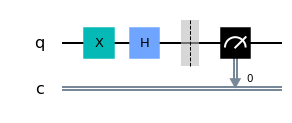

In [33]:
# This is the 7th element, which is a 0 in the bases array
# There should not be an H gate before the measurement on Bob's side
ne_circuits[7].draw('mpl')

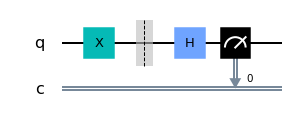

In [34]:
# This is the 10th element, which is a 1 in the bases array
# There should be an H gate before the measurement on Bob's side
ne_circuits[10].draw('mpl')

In [35]:
print("Alice sample: ", ne.alice_sample)
print("Bob sample:   ", ne.bob_sample)

Alice sample:  [0 1 0 1 1]
Bob sample:    [0 1 0 1 1]


In [36]:
print("Alice key: ", ne.alice_key)
print("Bob key:   ", ne.bob_key)

Alice key:  [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]
Bob key:    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]


In [37]:
print("Probability that Eave is undetected IF she were present: ", round(ne.prob_eave_win() * 100, 2), "%")

Probability that Eave is undetected IF she were present:  23.73 %


## Example with Eavesdropper

In [38]:
e = QKD(True, 30, 5, seed=5)

In [39]:
print("Alice bits:  ", e.alice_bits)
print("Alice bases: ", e.alice_bases)

Alice bits:   [1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0]
Alice bases:  [0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0]


In [40]:
e_circuits = e.circuits()

In [45]:
print("Bob bases:   ", e.bob_bases)
print("Bob results: ", e.bob_results)

Bob bases:    [0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0]
Bob results:  [1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0]


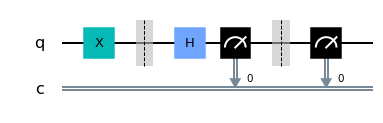

In [46]:
e_circuits[0].draw('mpl')

In [47]:
print("Alice sample: ", e.alice_sample)
print("Bob sample:   ", e.bob_sample)

Alice sample:  [1 1 0 0 0]
Bob sample:    [1 0 1 1 0]


In [48]:
print("Alice key: ", e.alice_sample)
print("Bob key:   ", e.bob_sample)

Alice key:  [1 1 0 0 0]
Bob key:    [1 0 1 1 0]


In [49]:
print("Probability that Eave is undetected: ", round(ne.prob_eave_win() * 100, 2), "%")

Probability that Eave is undetected:  23.73 %
